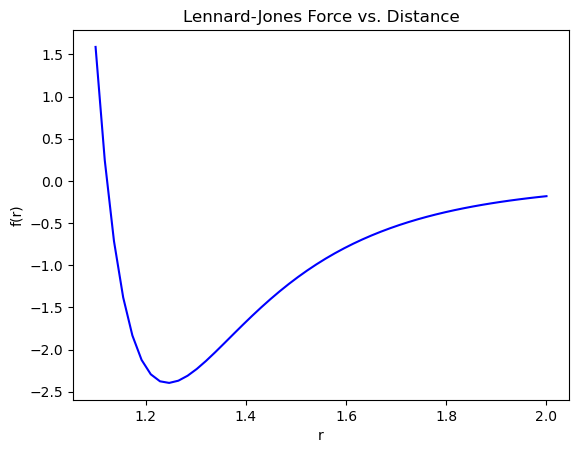

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

# Define the Lennard-Jones force equation
F = lambda _r: 24 * (2 / _r ** 13 - 1 / _r ** 7)
r = np.linspace(1.1, 2.0, 50)

# And plot it against r
plt.plot(r, F(r), 'b-')
plt.xlabel('r')
plt.ylabel('f(r)')
plt.title('Lennard-Jones Force vs. Distance')
plt.show()

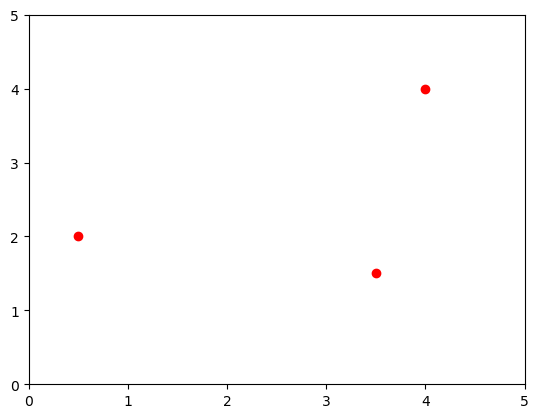

     x           y
0) 0.0167     -0.0646
1) 0.1500     0.0025
2) -0.1667     -0.0046


In [2]:
%matplotlib inline

# Definitions of the grid size AKA the coordinate system of all interactions
height, width = 5.0, 5.0

def LennardJonesForceSingle(particle : int, particles : np.array, screenSize : np.array):
    """gets the force on a single particle 'particle' whose index is j of the 'particles' (array | list | tuple)

    Args:
        particle (int): index of particle under evaluation
        particles (np.array | list | tuple): the complete set of particle positions in the system, including the one of interest
        screenSize (np.array): width, height of screen

    Returns:
        np.array: force vector on the particle
    """
    j = particle
    particle = particles[j]
    
    # Make an empty force array to add the total upon
    F = np.zeros(len(particle), float)
    
    # **NOTE** Force vector points from particle to p
    
    for i, p in enumerate(particles):
        if i == j:
            pass
        else:
            # Get the distance x to the left, current, and right views of the grid by moving p a screenwidth over at a time
            rxlcr = (p[0] - screenSize[0]) - particle[0], p[0] - particle[0], (p[0] + screenSize[0]) - particle[0]
            rx = - rxlcr[np.argmin([abs(x) for x in rxlcr])]
            
            # And do the same thing but in the y direction down, current, and up
            rydcu = (p[1] - screenSize[1]) - particle[1], p[1] - particle[1], (p[1] + screenSize[1]) - particle[1]
            ry = - rydcu[np.argmin([abs(y) for y in rydcu])]
            
            # Make an r vector for numpy quickness
            r = np.array([rx, ry], float)
            
            # And accumulate the force vector components from the Lennard-Jones Force function
            F += 24 * (2 / norm(r) ** 6 - 1) * r / norm(r) ** 8
    
    return F

positions = np.array([[4, 4],[3.5, 1.5],[0.5, 2]], float)

plt.plot([x[0] for x in positions],[x[1] for x in positions], 'r.', ms = 12)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

screenSize = np.array([width, height], float)

# Recreate the table displayed at the top of the page
f0 = LennardJonesForceSingle(particle = 0, particles = positions, screenSize = screenSize)
f1 = LennardJonesForceSingle(particle = 1, particles = positions, screenSize = screenSize)
f2 = LennardJonesForceSingle(particle = 2, particles = positions, screenSize = screenSize)

print('     x           y')
print(f'0) {f0[0]:.4f}     {f0[1]:.4f}')
print(f'1) {f1[0]:.4f}     {f1[1]:.4f}')
print(f'2) {f2[0]:.4f}     {f2[1]:.4f}')

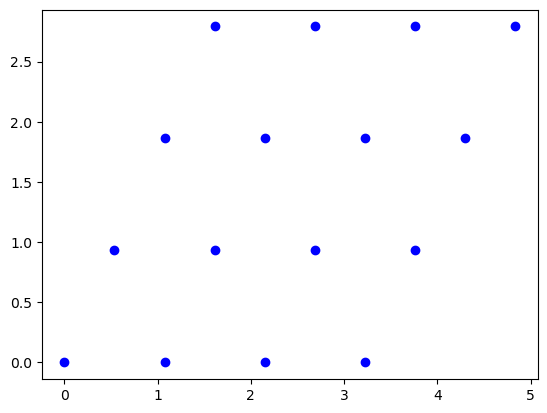

In [3]:
%matplotlib inline

# Function to generate a set of N particles given a standardized basis for a specified lattice structure (the basis vectors which form that lattice)
def InitializeParticles(basisVectors : list, N : int, randomize : bool = False):
    """returns an initialized set of particles on a lattice geometry defined by the basis vectors passed in

    Args:
        basisVectors (list): list or pair of np.array's containing the basis vector set for a 2D lattice
        N (int): number of particles in the lattice

    Returns:
        particles: a list of np.array's
    """
    # Create an empty list to contain the particle positions
    particles = [_ for _ in range(N)]
    
    base = int(N ** 0.5)
    
    for j in range(N):
        # The coefficients of the basis vectors are integral, which enforces lattice points to follow
        # the geometric shape given by the basis vectors, as well as a designable spacing between points
        # in the lattice when not randomized
        particles[j] = np.copy(basisVectors[0] * (j % base) + basisVectors[1] * (j // base))
        
        if randomize:
            # Since the max magnitude given by a 2 component random.random function is sqrt[2], i divide by sqrt[2]
            # to normalize and multiply by 3 to get max displacement of 3 / 2 for pseudo-random positioning on the lattice
            particles[j] += 3 / 2 * np.random.random(size = 2) / np.sqrt(2)
    
    return particles

# Problem 1 -> Triangular lattice basis
β = [
    1.07457 * np.array([1.0, 0.0], float),
    1.07457 * np.array([0.5, 3 ** 0.5 / 2], float)
]

α = [
    np.array([1.0, 0.0], float),
    np.array([0.0, 1.0], float)
]

N = 16

# Make the particle positions by initialization
particles = InitializeParticles(basisVectors = β, N = N, randomize = 0)

# And then plot the lattice
plt.plot([x[0] for x in particles], [x[1] for x in particles], 'b.', ms = 12)
plt.show()

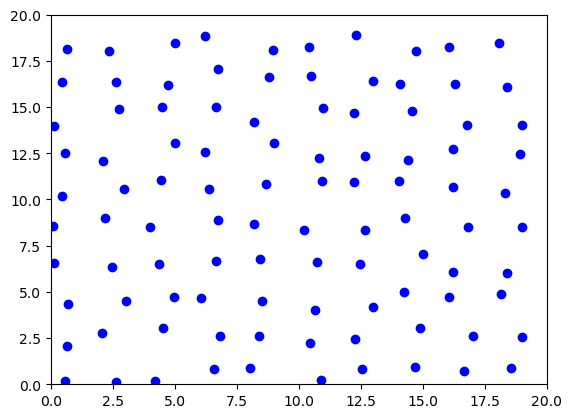

In [6]:
%matplotlib inline
# Plotting the 10 x 10 box with basis vectors a1 = [2, 0] and a2 = [0, 2] and then randomize their positions after placement on the lattice

screenSize[0], screenSize[1] = 20.0, 20.0
N = 100
α = [
    np.array([2.0, 0.0], float),
    np.array([0.0, 2.0], float)
]

particles = InitializeParticles(basisVectors = α, N = N, randomize = True)

# And then plot the lattice
plt.plot([x[0] for x in particles], [x[1] for x in particles], 'b.', ms = 12)
plt.xlim(0.0, screenSize[0])
plt.ylim(0.0, screenSize[1])
plt.show()

In [ ]:
class LatticeStructure:
    def __init__(self, N : int, basisVectors : list, screenSize : np.array, x0 : float, y0 : float, randomize : bool = False):
        self.N = N
        self.base = int(N ** 0.5)
        self.basisVectors = basisVectors
        self.screenSize = screenSize
        self.x0 = x0
        self.y0 = y0
        self.randomize = randomize
        
        self.InitializeLattice()
        
    def InitializeLattice(self):
        # Create an empty list to contain the particle positions
        self.lattice = [_ for _ in range(self.N)]
        
        base = int(self.N ** 0.5)
        
        for j in range(self.N):
            # The coefficients of the basis vectors are integral, which enforces lattice points to follow
            # the geometric shape given by the basis vectors, as well as a designable spacing between points
            # in the lattice when not randomized
            self.lattice[j] = np.copy(self.basisVectors[0] * (j % base) + self.basisVectors[1] * (j // self.base))
            
            if self.randomize:
                # Since the max magnitude given by a 2 component random.random function is sqrt[2], i divide by sqrt[2]
                # to normalize and multiply by 3 to get max displacement of 3 / 2 for pseudo-random positioning on the lattice
                self.lattice[j] += 3 / 2 * np.random.random(size = 2) / np.sqrt(2)
                
        return None
    
    def LennardJonesForceSingle(self, particle : int):
        """gets the force on a single particle 'particle' whose index is j of the 'particles' (array | list | tuple)

        Args:
            particle (int): index of particle under evaluation

        Returns:
            np.array: force vector on the particle
        """
        j = particle
        particle = self.lattice[j]

        # Make an empty force array to add the total upon
        F = np.zeros(len(particle), float)

        # **NOTE** Force vector points from 'particle' to p

        for i, p in enumerate(particles):
            if i == j:
                pass
            else:
                # Get the distance x to the left, current, and right views of the grid by moving p a screenwidth over at a time
                rxlcr = (p[0] - screenSize[0]) - particle[0], p[0] - particle[0], (p[0] + screenSize[0]) - particle[0]
                rx = - rxlcr[np.argmin([abs(x) for x in rxlcr])]

                # And do the same thing but in the y direction down, current, and up
                rydcu = (p[1] - screenSize[1]) - particle[1], p[1] - particle[1], (p[1] + screenSize[1]) - particle[1]
                ry = - rydcu[np.argmin([abs(y) for y in rydcu])]

                # Make an r vector for numpy quickness
                r = np.array([rx, ry], float)

                # And accumulate the force vector components from the Lennard-Jones Force function
                F += 24 * (2 / norm(r) ** 6 - 1) * r / norm(r) ** 8

        return F
    
    def UpdateLattice(self, dt : float):
        
        return None
    
    def Animate(self, tFinal : float, dt : float):
        t = 0.0
        
        while t <= tFinal:
            
            pass
        
        return None